In [2]:
import tensorflow as tf  
import pickle 


In [ ]:
def read_image(image_path) :
    load_image=tf.load(image_path)
    
def compare
    

In [1]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.utils import load_img

class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    
    def extract(self, img):
        img=load_img(img)
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [2]:
def eucledian_distance(x,y):
  eucl_dist = np.linalg.norm(x - y)
  return eucl_dist

In [9]:
fe=FeatureExtractor()
a=fe.extract(r"C:\Magang\Toyota\face_recognition\dataset\elon1.png")
b=fe.extract(r"C:\Magang\Toyota\face_recognition\dataset\elon2.jpg")
c=fe.extract(r"C:\Magang\Toyota\face_recognition\dataset\WIN_20250218_08_23_46_Pro.jpg")
d=fe.extract(r"C:\Magang\Toyota\face_recognition\dataset\messi.png")

1/1 [==============================] - 0s 15ms/step


In [12]:
print(eucledian_distance(a,d))

0.5994775


In [7]:
print(eucledian_distance(b,c))

0.95328134


# Facenet Pytorch

In [1]:
from facenet_pytorch import InceptionResnetV1

# If required, create a face detection pipeline using MTCNN:
# mtcnn = MTCNN(image_size=<image_size>, margin=<margin>)

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

c:\Users\krisn\anaconda3\envs\face_recog\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 107M/107M [00:15<00:00, 7.43MB/s] 


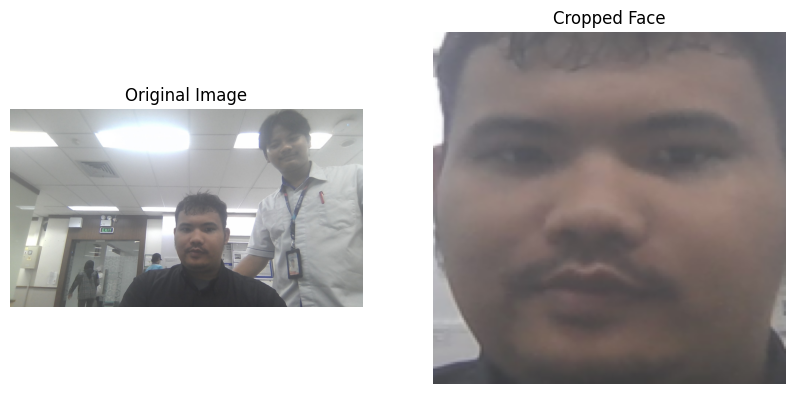

Embedding shape: torch.Size([1, 512])
Class probabilities: tensor([[-0.2786,  2.0216, -1.3320,  ..., -1.1487,  1.7333,  2.1439]],
       grad_fn=<AddmmBackward0>)


In [3]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from tensorflow.keras.utils import load_img
import torch
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2
# Load image
img = load_img(r"C:\Magang\Toyota\face_recognition\dataset\WIN_20250218_12_35_46_Pro.jpg")
to_pil = transforms.ToPILImage()
# Convert PIL image to NumPy array for visualization
img_np = np.array(img)

# Initialize MTCNN for face detection
mtcnn = MTCNN(    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True)

# Detect face and crop it
img_cropped,a = mtcnn(img,save_path=r"C:\Magang\Toyota\face_recognition\dataset\croped_img\BERTIGA1.jpg")

if img_cropped is None:
    print("No face detected!")
else:
    # Convert tensor to numpy and ensure it's on CPU
    img_cropped_np = img_cropped.permute(1, 2, 0).cpu().numpy()
    to_pil = transforms.ToPILImage()
    face_img = to_pil(img_cropped_np)
    # Ensure correct scaling
    if img_cropped_np.max() <= 1.0:
        img_cropped_np = (img_cropped_np * 255).astype(np.uint8)  # Scale to 0-255
    else:
        img_cropped_np = img_cropped_np.astype(np.uint8)  # Already in 0-255 range

    # Convert to BGR for OpenCV
    img_cropped_bgr = cv2.cvtColor(img_cropped_np, cv2.COLOR_RGB2BGR)

    # Save with OpenCV
    cv2.imwrite("cropped_face.jpg", img_cropped_bgr)

    # Convert back to RGB for correct Matplotlib display
    img_cropped_rgb = cv2.cvtColor(img_cropped_bgr, cv2.COLOR_BGR2RGB)
    # Show original and cropped image
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    ax[0].imshow(img_np)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(a)
    ax[1].set_title("Cropped Face")
    ax[1].axis("off")

    plt.show()

    # Initialize InceptionResnetV1 for face embedding
    resnet = InceptionResnetV1(pretrained="vggface2").eval()

    # Ensure img_cropped is in the right format (unsqueeze to add batch dimension)
    img_cropped = img_cropped.unsqueeze(0)  # Convert to (1, 3, 160, 160)

    # Calculate embedding
    img_embedding = resnet(img_cropped)

    print("Embedding shape:", img_embedding.shape)

    # If using for classification
    resnet.classify = True
    img_probs = resnet(img_cropped)

    print("Class probabilities:", img_probs)


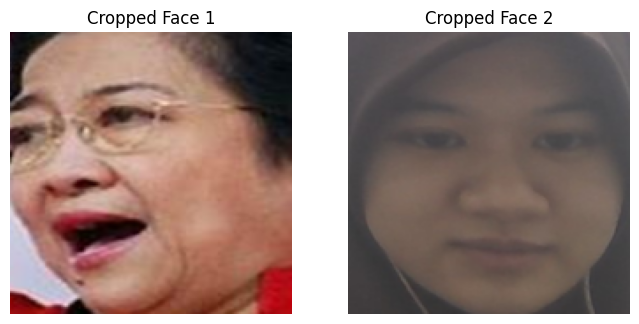

Cosine Similarity: 0.4201
Different persons.


In [65]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import numpy as np
from torchvision import transforms
import cv2
from tensorflow.keras.utils import load_img

# Initialize MTCNN and FaceNet model
mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20,
              thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True)

resnet = InceptionResnetV1(pretrained="vggface2").eval()

def preprocess_image(img_path):
    """Loads an image, detects face, and returns embedding."""
    img = load_img(img_path)
    face_tensor, _ = mtcnn(img, return_prob=False)
    
    if face_tensor is None:
        print(f"No face detected in {img_path}")
        return None
    
    face_tensor = face_tensor.unsqueeze(0)  # Add batch dimension
    embedding = resnet(face_tensor)  # Extract embedding
    return embedding,_

def cosine_similarity(emb1, emb2):
    """Computes cosine similarity between two embeddings."""
    emb1 = emb1 / emb1.norm()
    emb2 = emb2 / emb2.norm()
    return torch.dot(emb1.squeeze(), emb2.squeeze()).item()

# Paths to two images
img1_path = r"C:\Magang\Toyota\face_recognition\dataset\megawati orasi.jpg"
img2_path = r"C:\Magang\Toyota\face_recognition\dataset\WIN_20250218_09_00_58_Pro.jpg"

# Extract embeddings
embedding1,_1 = preprocess_image(img1_path)
embedding2,_2 = preprocess_image(img2_path)

# Show cropped faces
if embedding1 is not None and embedding2 is not None:
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    ax[0].imshow(_1)
    ax[0].set_title("Cropped Face 1")
    ax[0].axis("off")

    ax[1].imshow(_2)
    ax[1].set_title("Cropped Face 2")
    ax[1].axis("off")

    plt.show()

    # Compute similarity
    similarity = cosine_similarity(embedding1, embedding2)
    print(f"Cosine Similarity: {similarity:.4f}")

    # Define threshold (adjust as needed)
    threshold = 0.6
    if similarity > threshold:
        print("Same person!")
    else:
        print("Different persons.")



In [36]:
similarity = cosine_similarity(embedding1, embedding2)


In [ ]:
import time 
starts=time.time()
similarity = cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {similarity:.4f}")

# Define threshold (adjust as needed)
threshold = 0.6
if similarity > threshold:
    print("Same person!")
else:
    print("Different persons.")
ends=time.time() -starts


Cosine Similarity: 0.7704
Same person!


In [48]:
ends*1000

1.1012554168701172

In [ ]:
similarity

In [16]:
embedding2

tensor([[ 0.0125,  0.0273, -0.0227,  0.0228, -0.0274, -0.0149,  0.0018, -0.0162,
          0.0482, -0.0277,  0.0401,  0.0176,  0.0652,  0.0565, -0.0257, -0.0440,
          0.0441, -0.0071,  0.0299,  0.0121, -0.0290, -0.0488,  0.0742, -0.1128,
          0.0012, -0.0309,  0.0367, -0.0352,  0.0540, -0.0303,  0.0633,  0.0642,
         -0.0519,  0.0308, -0.0592, -0.0800, -0.0462, -0.0302, -0.0918,  0.0151,
         -0.0290, -0.0604,  0.0009,  0.0785, -0.0491, -0.0640,  0.0252,  0.0666,
         -0.0853, -0.0773, -0.0302, -0.0521,  0.0203, -0.0425, -0.0051,  0.0107,
         -0.0545,  0.0027,  0.0297,  0.0499, -0.0403,  0.0544, -0.0113,  0.0839,
          0.0321,  0.0307, -0.0361, -0.0645, -0.0546, -0.0849, -0.0028, -0.0267,
          0.0720,  0.0245, -0.0335, -0.0286,  0.0441, -0.0826,  0.0205, -0.0050,
          0.0449, -0.0185, -0.0405,  0.0627,  0.0604,  0.0094, -0.0371,  0.0089,
         -0.0116, -0.0176,  0.0247,  0.0257,  0.0408, -0.0391,  0.0200,  0.0145,
         -0.0713,  0.0406,  

# Compare

In [56]:
import os
import torch
import numpy as np
from facenet_pytorch import MTCNN, InceptionResnetV1
from tensorflow.keras.utils import load_img

# Initialize MTCNN for face detection and FaceNet for embeddings
mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20,
              thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True)
resnet = InceptionResnetV1(pretrained="vggface2").eval()

def preprocess_image(img_path):
    """Detect face and return embedding."""
    img = load_img(img_path)
    face_tensor, _ = mtcnn(img, return_prob=False)

    if face_tensor is None:
        print(f"No face detected in {img_path}")
        return None
    
    face_tensor = face_tensor.unsqueeze(0)  # Add batch dimension
    embedding = resnet(face_tensor)  # Extract embedding
    return embedding

def save_embeddings(folder_path, output_file="embeddings.pt"):
    """Process all images in a folder and save embeddings as a dictionary."""
    embeddings_dict = {}
    
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)

        # Check if it's an image
        if img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            embedding = preprocess_image(img_path)
            if embedding is not None:
                embeddings_dict[file_name] = embedding.detach().cpu().numpy()

    # Save dictionary as a .pt file
    torch.save(embeddings_dict, output_file)
    print(f"Saved {len(embeddings_dict)} embeddings to {output_file}")

# Folder containing face images
folder_path = r"C:\Magang\Toyota\face_recognition\dataset\comparable_dataset"

# Save embeddings to dictionary
save_embeddings(folder_path, r"C:\Magang\Toyota\face_recognition\output\megawati_embeddings.pt")


Saved 20 embeddings to C:\Magang\Toyota\face_recognition\output\megawati_embeddings.pt


In [60]:
def cosine_similarity(emb1, emb2):
    """Compute cosine similarity between two embeddings."""
    emb1 = emb1 / emb1.norm()
    emb2 = emb2 / emb2.norm()
    return torch.dot(emb1.squeeze(), emb2.squeeze()).item()

def compare_with_database(test_img_path, embeddings_file, threshold=0.6):
    """Compare one image with all stored embeddings and find the closest match."""
    # Load saved embeddings
    embeddings_dict = torch.load(embeddings_file)

    # Process test image
    test_embedding = preprocess_image(test_img_path)
    
    if test_embedding is None:
        print("No face detected in test image!")
        return

    similarities = []

    for img_name, emb in embeddings_dict.items():
        emb_tensor = torch.tensor(emb)  # Convert stored embedding to tensor
        similarity = cosine_similarity(test_embedding, emb_tensor)
        similarities.append((img_name, similarity))

    # Sort based on similarity (highest first)
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print results
    print("\nComparison Results:")
    for img_name, score in similarities:
        print(f"Similarity with {img_name}: {score:.4f}")

    # Best match
    best_match, best_score = similarities[0]

    print("\nBest Match:", best_match)
    if best_score > threshold:
        print(f"Same person! (Similarity: {best_score:.4f})")
    else:
        print(f"Different person (Similarity: {best_score:.4f})")

# Path ke gambar yang ingin dibandingkan
test_img_path = r"C:\Magang\Toyota\face_recognition\dataset\elon2.jpg"

# Bandingkan dengan database
compare_with_database(test_img_path, r"C:\Magang\Toyota\face_recognition\output\megawati_embeddings.pt")



Comparison Results:
Similarity with elon2.jpg: 1.0000
Similarity with test-crop.jpg: 0.9474
Similarity with elon1.png: 0.7442
Similarity with mas riki.jpg: 0.4086
Similarity with Foto UGM2.jpeg: 0.2985
Similarity with WIN_20250218_08_31_11_Pro.jpg: 0.2694
Similarity with MEGAWATI-748x430.jpg: 0.2424
Similarity with WIN_20250218_08_23_46_Pro.jpg: 0.2185
Similarity with pdip-jatim-megawati-090621-1bu mega.jpg: 0.1561
Similarity with jolie2.jpg: 0.1257
Similarity with mega cemberut.jpg: 0.1244
Similarity with megawati orasi.jpg: 0.1216
Similarity with messi3.jpg: 0.0603
Similarity with jolie1.jpg: 0.0458
Similarity with ronaldo1.jpg: 0.0151
Similarity with WIN_20250218_09_00_58_Pro.jpg: 0.0061
Similarity with ronaldo2.jpeg: -0.0277
Similarity with messi.png: -0.0530
Similarity with mas izhar.jpg: -0.0577
Similarity with messi2.jpg: -0.1545

Best Match: elon2.jpg
Same person! (Similarity: 1.0000)
